<a href="https://colab.research.google.com/github/dammkevin/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [142]:
# Acquire the stock quote
df = yf.download('AMZN', start='2017-01-01', end='2027-12-25')

# Flatten MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN
Date,,,,,,
2017-01-03 00:00:00+00:00,37.683498,37.683498,37.938000,37.384998,37.896000,70422000
2017-01-04 00:00:00+00:00,37.859001,37.859001,37.984001,37.709999,37.919498,50210000
2017-01-05 00:00:00+00:00,39.022499,39.022499,39.119999,38.013000,38.077499,116602000
2017-01-06 00:00:00+00:00,39.799500,39.799500,39.972000,38.924000,39.118000,119724000
2017-01-09 00:00:00+00:00,39.846001,39.846001,40.088501,39.588501,39.900002,68922000
...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,208.910004,208.910004,209.539993,206.009995,208.369995,38942900
2024-11-13 00:00:00+00:00,214.100006,214.100006,215.089996,209.139999,209.399994,46212900
2024-11-14 00:00:00+00:00,211.479996,211.479996,215.899994,210.880005,214.160004,42620300


In [143]:
# Get the number of rows and columns in the data set
df.shape

(1983, 6)

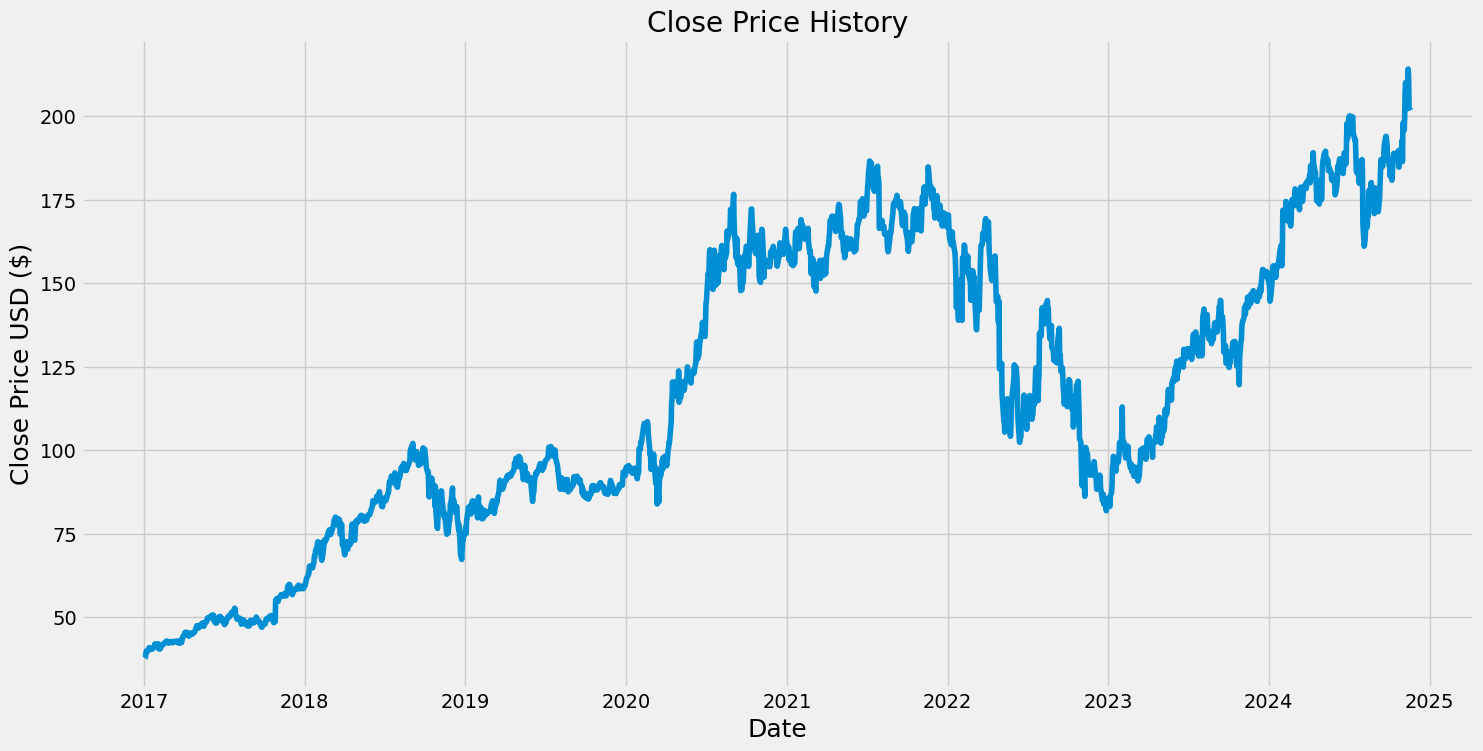

In [144]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'] if 'Close' in df.columns else df.filter(like='Close').iloc[:, 0])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [145]:
# Create a new dataframe with only the 'Close' column
if 'Close' in df.columns:
    data = df.filter(['Close'])
elif any('Close' in col for col in df.columns):
    data = df.filter(like='Close')
else:
    raise ValueError("Expected column 'Close' not found in the data.")

# Convert the dataframe to a NumPy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1587

In [146]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        , 0.        ],
       [0.00099482, 0.00099482],
       [0.00759   , 0.00759   ],
       ...,
       [0.98514872, 0.98514872],
       [0.93487001, 0.93487001],
       [0.92971174, 0.92971174]])